In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('creditcard.csv')

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

data = data.drop(columns=['Time'])

# Drop rows with NaN values in the target column
data_cleaned = data.dropna(subset=['Class'])

X = data_cleaned.drop(columns=['Class'])
y = data_cleaned['Class']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Applying SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


Random Forest Model

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18398
         1.0       0.89      0.86      0.88        49

    accuracy                           1.00     18447
   macro avg       0.95      0.93      0.94     18447
weighted avg       1.00      1.00      1.00     18447

Precision: 0.8936170212765957
Recall: 0.8571428571428571
F1-Score: 0.875
Accuracy: 0.9993494877215807


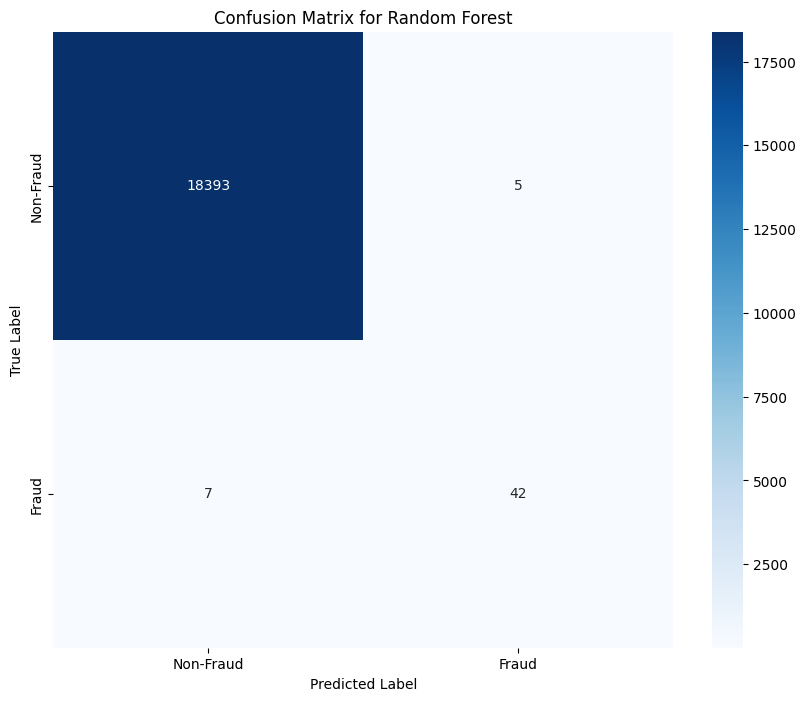

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1-Score: {f1_rf}')
print(f'Accuracy: {accuracy_rf}')

# Confusion Matrix for positives and negatives
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                 xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

plt.title(f'Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


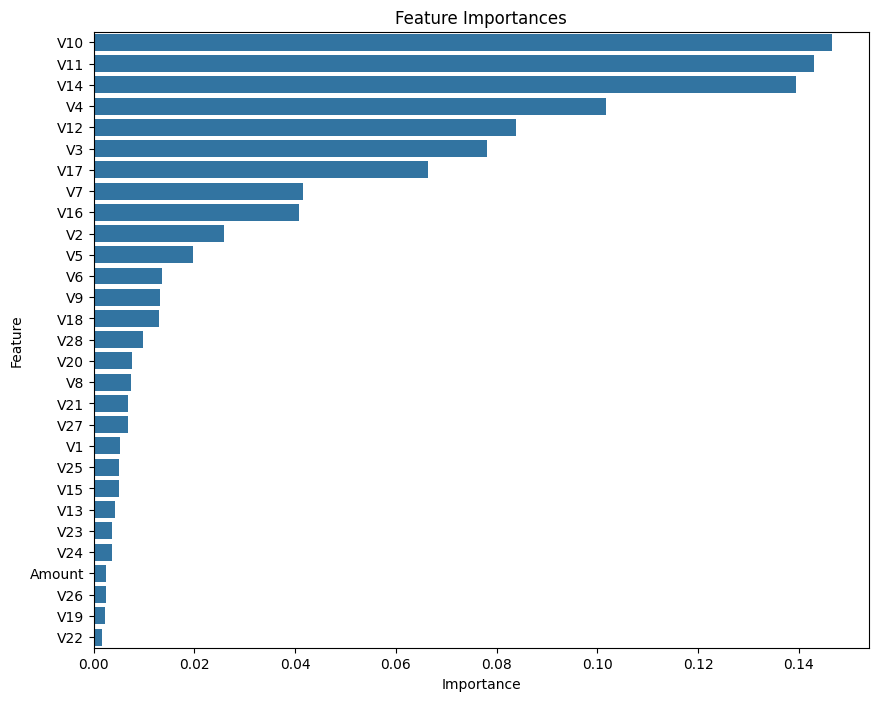

In [20]:
# Feature Importance
feature_importances = rf_model.feature_importances_
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances')
plt.show()

